In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *
import math
from scipy import signal as sig
sns.set_style("whitegrid")

In [125]:
%matplotlib inline
#%matplotlib widget 
#Trocar conforme necessário

In [2]:
users_exp = pd.read_pickle("users.dat")

In [3]:
user1_1, user1_2, user2_1, user2_2, user3_1, user3_2, user4_1, user4_2 = users_exp

In [223]:
def plot_axes(user, index):
    figure, subplots = plt.subplots(nrows=3, ncols=1, figsize=(16,10))
    figure.suptitle(f"Valores Obtidos Pelo Acelerómetro na Experiência {index%2+1} do Sujeito {index//2+1}", fontsize = 'xx-large')
    
    subplots[0].plot( user['Time (min)'], user['X'], lw = 0.3)
    subplots[0].set_xlabel("Time (min)")
    subplots[0].set_ylabel("ACC_X")
    subplots[0].set_xlim(0, max(user['Time (min)']))
    
    subplots[1].plot( user['Time (min)'], user['Y'], lw = 0.3)
    subplots[1].set_xlabel("Time (min)")
    subplots[1].set_ylabel("ACC_Y")
    subplots[1].set_xlim(0, max(user['Time (min)']))
    
    subplots[2].plot( user['Time (min)'], user['Z'], lw = 0.3)
    subplots[2].set_xlabel("Time (min)")
    subplots[2].set_ylabel("ACC_Z")
    subplots[2].set_xlim(0, max(user['Time (min)']))
    
    figure.tight_layout()

In [211]:
def plot_with_labels(upxvalues, downxvalues, up, down, user, index):
    figure, subplots = plt.subplots(nrows=3, ncols=1, figsize=(16,10))
    figure.suptitle(f"Valores Obtidos Pelo Acelerómetro na Experiência {index%2+1} do Sujeito {index//2+1}", fontsize = 'xx-large')
    
    subplots[0].plot( user['Time (min)'], user['X'], lw = 0.3)
    subplots[0].set_xlabel("Time (min)")
    subplots[0].set_ylabel("ACC_X")
    subplots[0].set_xlim(0, max(user['Time (min)']))
    
    subplots[1].plot( user['Time (min)'], user['Y'], lw = 0.3)
    subplots[1].set_xlabel("Time (min)")
    subplots[1].set_ylabel("ACC_Y")
    subplots[1].set_xlim(0, max(user['Time (min)']))
    
    subplots[2].plot( user['Time (min)'], user['Z'], lw = 0.3)
    subplots[2].set_xlabel("Time (min)")
    subplots[2].set_ylabel("ACC_Z")
    subplots[2].set_xlim(0, max(user['Time (min)']))
    
    xmin,xmax = subplots[0].get_xlim()
    
    
    for i in range(len(upxvalues)):
        yv = 0.95 if i%2==0 else 0.90
        frase = up[i]
        xv = upxvalues[i]/xmax
        
        subplots[0].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[0].transAxes, xytext = (xv,yv))
        subplots[1].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[1].transAxes, xytext = (xv,yv))
        subplots[2].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[2].transAxes, xytext = (xv,yv))
        
    yv = 0.01 
    for i in range(len(downxvalues)):
        frase = down[i]
        xv = downxvalues[i]/xmax
        
        subplots[0].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[0].transAxes, xytext = (xv,yv))
        subplots[1].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[1].transAxes, xytext = (xv,yv))
        subplots[2].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[2].transAxes, xytext = (xv,yv))
    figure.tight_layout()

#### Colors in Use ['black','royalblue','darkorange','goldenrod','rebeccapurple','green','darkturquoise','maroon']

In [206]:
print( len(downintervals), len(upintervals))

11 12


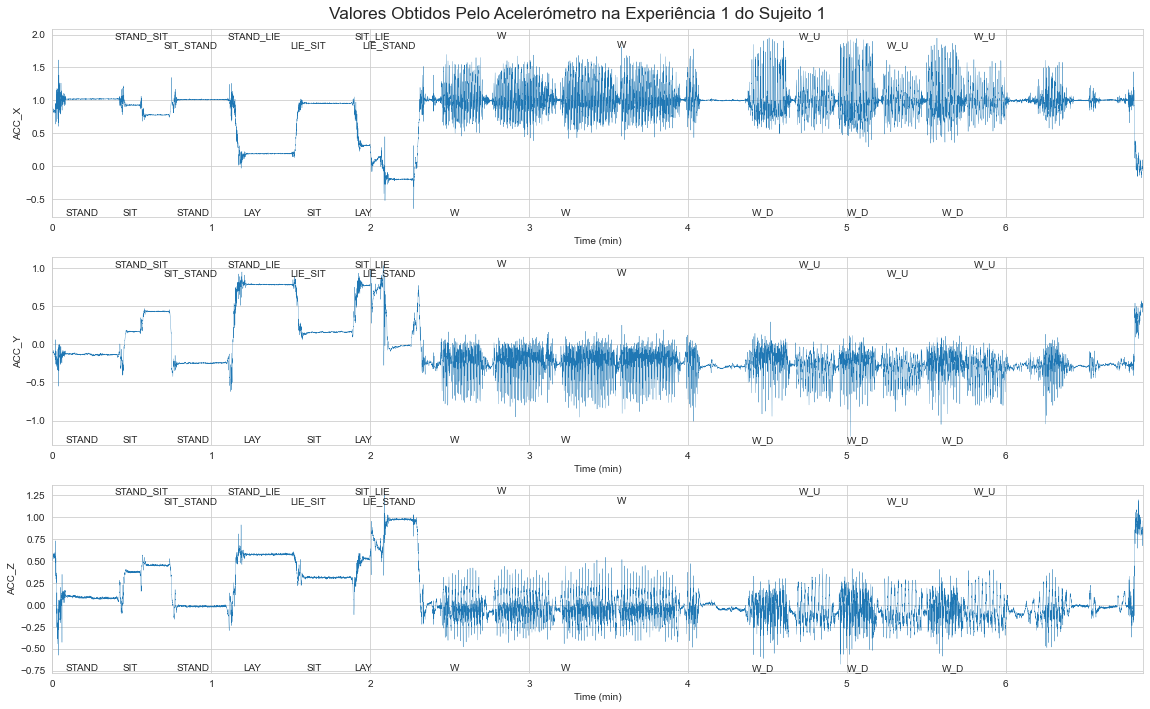

In [220]:
downintervals = [0.08, 0.44, 0.78,  1.2, 1.6, 1.9, 2.5,  3.2, 4.4, 5, 5.6]
upintervals = [0.39, 0.7, 1.1, 1.5, 1.9, 1.95, 2.8, 3.55, 4.7, 5.25, 5.8  ]

downlabels = ['STAND', 'SIT', 'STAND','LAY', 'SIT', 'LAY', 'W', 'W','W_D', 'W_D', 'W_D']
uplabels = ['STAND_SIT', 'SIT_STAND', 'STAND_LIE', 'LIE_SIT', 'SIT_LIE', 'LIE_STAND', 'W', 'W', 'W_U', 'W_U', 'W_U' ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user1_1, 0)

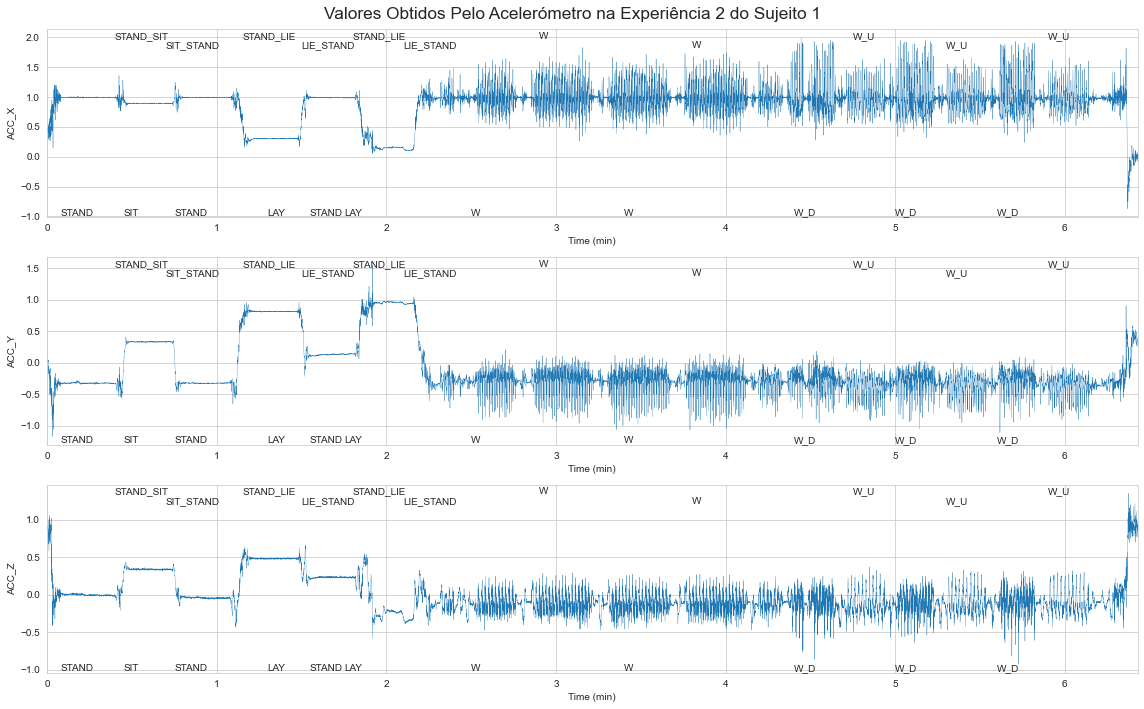

In [251]:
downintervals = [ 0.08, 0.45, 0.75, 1.3, 1.55, 1.75, 2.5, 3.4, 4.4, 5, 5.6]
upintervals = [ 0.40, 0.7, 1.15, 1.5, 1.8, 2.1, 2.9, 3.8, 4.75, 5.3, 5.9 ]

downlabels = [ 'STAND', "SIT", "STAND", "LAY", "STAND", "LAY", "W", "W", "W_D", "W_D", "W_D" ]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_STAND", "STAND_LIE", "LIE_STAND", "W", "W", "W_U", "W_U", "W_U" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user1_2, 1)

In [ ]:
downintervals = [  ]
upintervals = [  ]

downlabels = [  ]
uplabels = [  ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user2_1, 2)

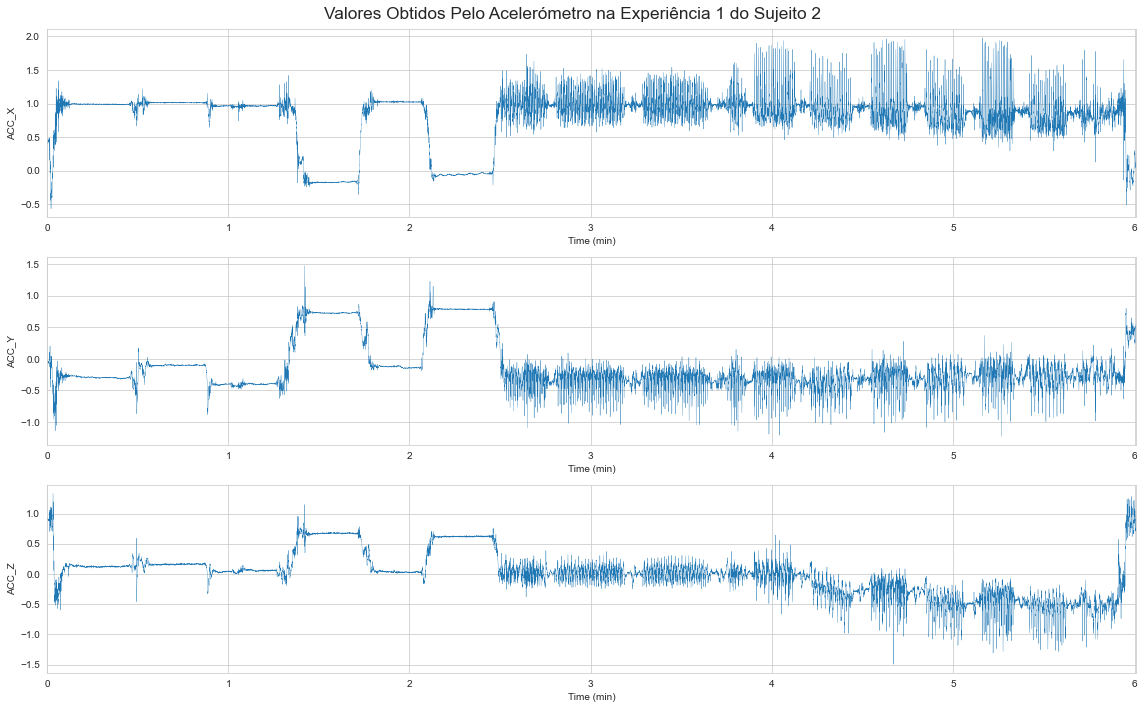

In [250]:
%matplotlib inline
plot_axes(user2_1, 2)